In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import datetime

In [2]:
time = pd.read_excel("regression dataset.xls",index_col=[0],parse_dates=[0])
time.head()

,Credit Card,Debit Card,RTGS,NEFT,Total
Month-Year,,,,,
2015-01-01,17947247.0,11151245.0,889032.0,16342282,46329806.0
2015-02-01,15602279.0,10288412.0,865068.0,19244474,46000233.0
2015-03-01,17970090.0,11582587.0,1072737.0,26906303,57531717.0
2015-04-01,18188579.0,12044987.0,895710.0,17862349,48991625.0
2015-05-01,19313259.0,13368953.0,934185.0,21496984,55113381.0


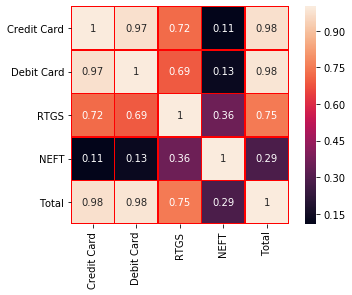

In [3]:
import seaborn as sns
sns.heatmap(time.corr(),linewidth=0.2,vmax=1.0,square=True,linecolor='red',annot=True)

In [4]:
time=time.drop(['Credit Card','NEFT','Debit Card','RTGS'],axis=1)
time.head()

,Total
Month-Year,
2015-01-01,46329806.0
2015-02-01,46000233.0
2015-03-01,57531717.0
2015-04-01,48991625.0
2015-05-01,55113381.0


In [5]:
time1 = time['Total']
time1.head()

Month-Year
2015-01-01    46329806.0
2015-02-01    46000233.0
2015-03-01    57531717.0
2015-04-01    48991625.0
2015-05-01    55113381.0
Name: Total, dtype: float64

In [6]:
time1.tail()

Month-Year
2019-08-01    1.222453e+08
2019-09-01    1.187573e+08
2019-10-01    1.360378e+08
2019-11-01    1.289876e+08
2019-12-01    1.202916e+08
Name: Total, dtype: float64

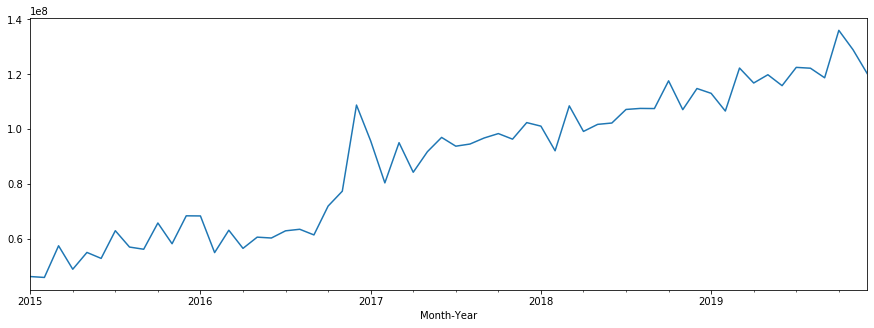

In [7]:
time1.plot(kind="line",figsize=(15,5))
plt.show()

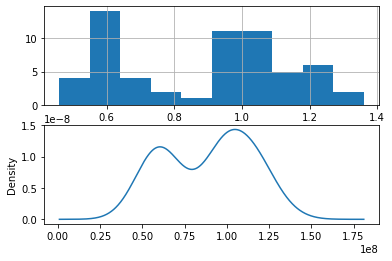

In [8]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
time.Total.hist()
pyplot.subplot(212)
time.Total.plot(kind='kde')
pyplot.show()
# can see that distribution is not normally distributed
# it is right distributed
# transformations might be useful while modelling

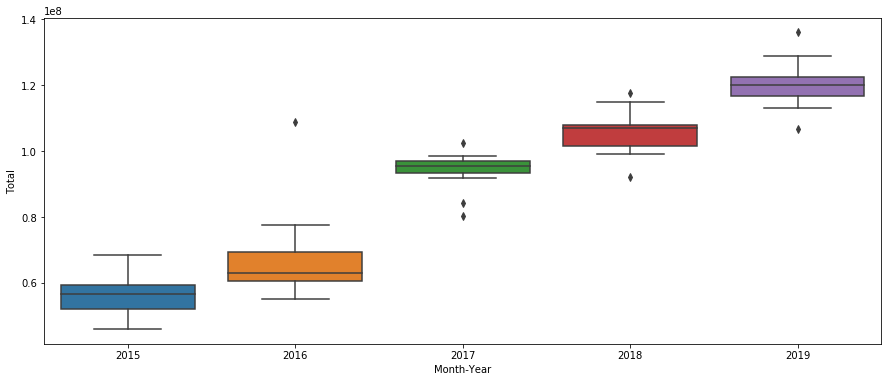

In [9]:
# box whisker plot
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(time.Total.index.year, time.Total, ax=ax)
# median values across year confirm upwward trend
# increase in middle 50% of data over time

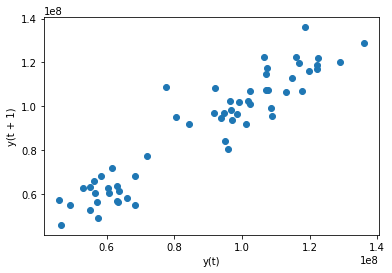

In [10]:
from pandas.plotting import lag_plot
lag_plot(time)
# showing positive correlation betwenn 1 lag time

In [11]:
time.shape

(60, 1)

In [12]:
#5 years * 12 months = 60 data points
#lets take 10 years data as TRAIN data and 2 years data as TEST data

In [13]:
train=time1[0:48] 
test=time1[48:]

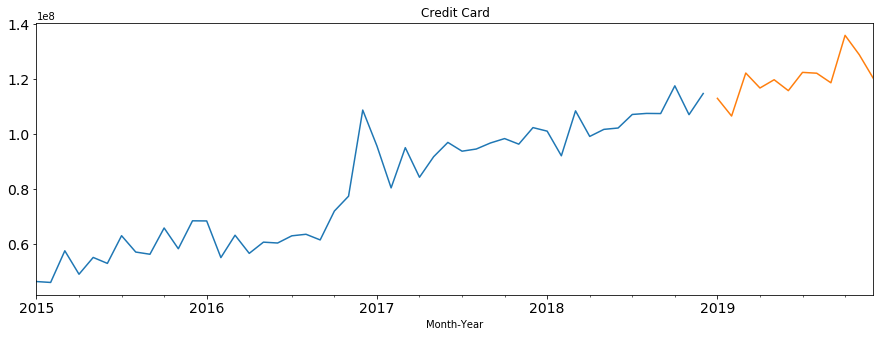

In [14]:
train.plot(figsize=(15,5), title= 'Credit Card', fontsize=14)
test.plot(figsize=(15,5), title= 'Credit Card', fontsize=14)
plt.show()

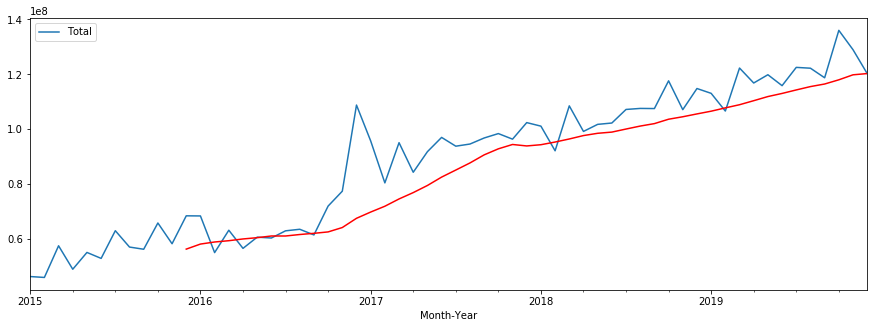

In [15]:
#moving_avg = pd.rolling_mean(time1,12)

moving_avg =time1.rolling(12).mean()
time.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.show()


### Decomposing using statsmodel:

We can use statsmodels to perform a deccomposition
IT deconstructs a time series into several components, each representing one of the underlying categories of patterns.
With statsmodels we will be able to see the trend, seasonal, and residual components of our data.

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


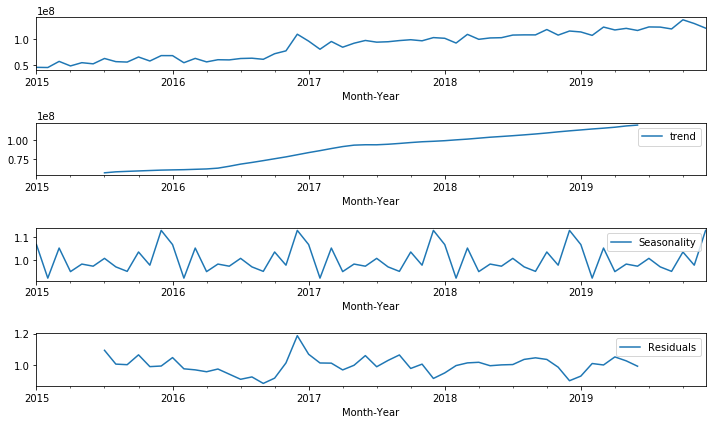

In [16]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time1,model='multiplicative', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time1.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [17]:
trend

Month-Year
2015-01-01             NaN
2015-02-01             NaN
2015-03-01             NaN
2015-04-01             NaN
2015-05-01             NaN
2015-06-01             NaN
2015-07-01    5.724289e+07
2015-08-01    5.854039e+07
2015-09-01    5.915422e+07
2015-10-01    5.970760e+07
2015-11-01    6.025661e+07
2015-12-01    6.079809e+07
2016-01-01    6.110573e+07
2016-02-01    6.137395e+07
2016-03-01    6.186146e+07
2016-04-01    6.233570e+07
2016-05-01    6.339037e+07
2016-06-01    6.586994e+07
2016-07-01    6.869077e+07
2016-08-01    7.088825e+07
2016-09-01    7.327592e+07
2016-10-01    7.576073e+07
2016-11-01    7.821379e+07
2016-12-01    8.103894e+07
2017-01-01    8.385147e+07
2017-02-01    8.643065e+07
2017-03-01    8.919665e+07
2017-04-01    9.176908e+07
2017-05-01    9.365980e+07
2017-06-01    9.418362e+07
2017-07-01    9.414151e+07
2017-08-01    9.485312e+07
2017-09-01    9.589939e+07
2017-10-01    9.707826e+07
2017-11-01    9.811301e+07
2017-12-01    9.874624e+07
2018-01-01    9.9

In [18]:
seasonal

Month-Year
2015-01-01    1.067837
2015-02-01    0.917665
2015-03-01    1.052329
2015-04-01    0.946775
2015-05-01    0.980578
2015-06-01    0.971079
2015-07-01    1.006120
2015-08-01    0.967963
2015-09-01    0.947889
2015-10-01    1.034691
2015-11-01    0.975613
2015-12-01    1.131463
2016-01-01    1.067837
2016-02-01    0.917665
2016-03-01    1.052329
2016-04-01    0.946775
2016-05-01    0.980578
2016-06-01    0.971079
2016-07-01    1.006120
2016-08-01    0.967963
2016-09-01    0.947889
2016-10-01    1.034691
2016-11-01    0.975613
2016-12-01    1.131463
2017-01-01    1.067837
2017-02-01    0.917665
2017-03-01    1.052329
2017-04-01    0.946775
2017-05-01    0.980578
2017-06-01    0.971079
2017-07-01    1.006120
2017-08-01    0.967963
2017-09-01    0.947889
2017-10-01    1.034691
2017-11-01    0.975613
2017-12-01    1.131463
2018-01-01    1.067837
2018-02-01    0.917665
2018-03-01    1.052329
2018-04-01    0.946775
2018-05-01    0.980578
2018-06-01    0.971079
2018-07-01    1.006120


In [19]:
residual

Month-Year
2015-01-01         NaN
2015-02-01         NaN
2015-03-01         NaN
2015-04-01         NaN
2015-05-01         NaN
2015-06-01         NaN
2015-07-01    1.094439
2015-08-01    1.007252
2015-09-01    1.003599
2015-10-01    1.065839
2015-11-01    0.991356
2015-12-01    0.995147
2016-01-01    1.048445
2016-02-01    0.977579
2016-03-01    0.970927
2016-04-01    0.959006
2016-05-01    0.976246
2016-06-01    0.943787
2016-07-01    0.911423
2016-08-01    0.926238
2016-09-01    0.885342
2016-10-01    0.918601
2016-11-01    1.014716
2016-12-01    1.186749
2017-01-01    1.069390
2017-02-01    1.014402
2017-03-01    1.013289
2017-04-01    0.970575
2017-05-01    0.999845
2017-06-01    1.060894
2017-07-01    0.990634
2017-08-01    1.030506
2017-09-01    1.065084
2017-10-01    0.979848
2017-11-01    1.007028
2017-12-01    0.916728
2018-01-01    0.951640
2018-02-01    0.998028
2018-03-01    1.014963
2018-04-01    1.018755
2018-05-01    0.997050
2018-06-01    1.002364
2018-07-01    1.004493


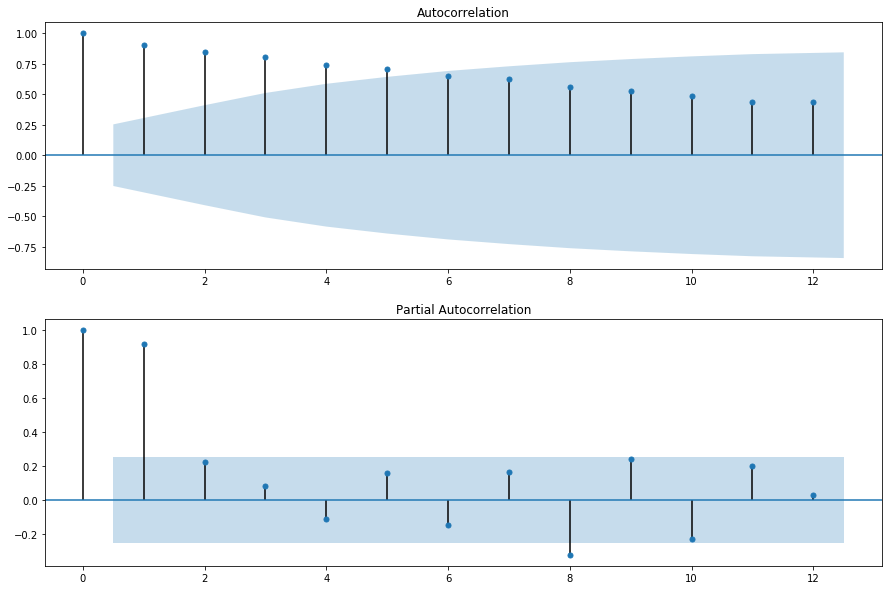

In [20]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(time1, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(time1, ax=pyplot.gca(),lags=12)
pyplot.show()

In [21]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [22]:
train = train.astype('double')
ses = SimpleExpSmoothing(train).fit()
ses1 = ses.forecast(12)
ses.summary()

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


Dep. Variable:,endog,No. Observations:,48
Model:,SimpleExpSmoothing,SSE,3012059390963453.000
Optimized:,True,AIC,1528.970
Trend:,None,BIC,1532.712
Seasonal:,None,AICC,1529.900
Seasonal Periods:,None,Date:,"Wed, 10 Jun 2020"
Box-Cox:,False,Time:,22:25:18
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5693795,alpha,True
initial_level,4.633e+07,l.0,True


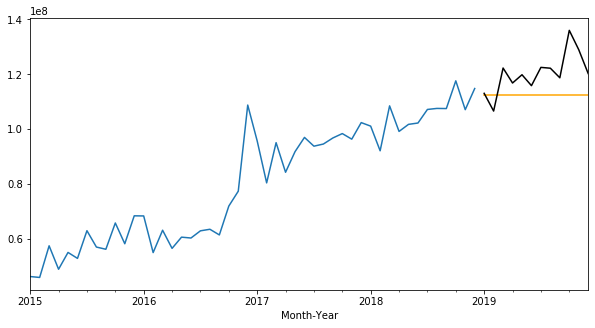

In [23]:
train.plot(kind="line",figsize=(10,5))
ses1.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')
plt.show()

In [24]:
hes = ExponentialSmoothing(train , trend='add').fit()
hes.summary()

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Dep. Variable:,endog,No. Observations:,48
Model:,ExponentialSmoothing,SSE,2859976269786608.000
Optimized:,True,AIC,1530.483
Trend:,Additive,BIC,1537.967
Seasonal:,None,AICC,1532.531
Seasonal Periods:,None,Date:,"Wed, 10 Jun 2020"
Box-Cox:,False,Time:,22:25:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4736842,alpha,True
smoothing_slope,0.0526316,beta,True


In [25]:
hes1 = hes.forecast(12)

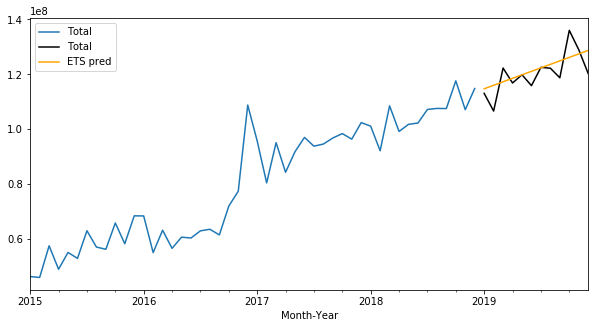

In [26]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [27]:
hwes = ExponentialSmoothing(train , seasonal_periods=12 ,trend='add', seasonal="multiplicative",).fit()
hwes.summary()

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Dep. Variable:,endog,No. Observations:,48
Model:,ExponentialSmoothing,SSE,1839510528414714.500
Optimized:,True,AIC,1533.300
Trend:,Additive,BIC,1563.239
Seasonal:,Multiplicative,AICC,1556.886
Seasonal Periods:,12,Date:,"Wed, 10 Jun 2020"
Box-Cox:,False,Time:,22:25:22
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7368421,alpha,True
smoothing_slope,0.0526316,beta,True


In [28]:
hwes1 = hwes.forecast(12)
print(hwes1)

2019-01-01    1.080892e+08
2019-02-01    9.261439e+07
2019-03-01    1.091973e+08
2019-04-01    9.806620e+07
2019-05-01    1.043312e+08
2019-06-01    1.059242e+08
2019-07-01    1.104976e+08
2019-08-01    1.103697e+08
2019-09-01    1.088288e+08
2019-10-01    1.172344e+08
2019-11-01    1.099021e+08
2019-12-01    1.275460e+08
Freq: MS, dtype: float64


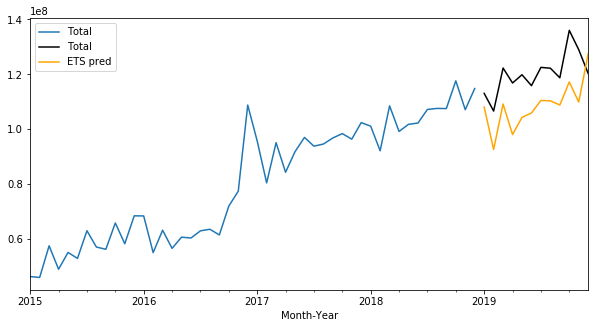

In [29]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [30]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolmean= pd.core.window.Rolling(timeseries, window=12).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=12).std()
    #rolmean = timeseries.rolling(12).mean()
    #rolstd  = timeseries.rolling(12).std()
    

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

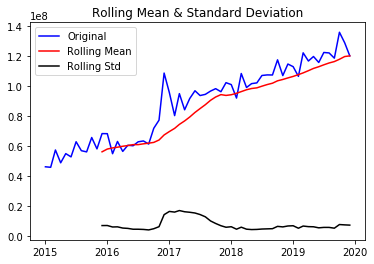

Results of Dickey-Fuller Test:
Test Statistic                 -0.591547
p-value                         0.872881
#Lags Used                      8.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


In [31]:
test_stationarity(time1)

In [32]:
diff1=train.diff()
diff1=diff1.dropna()

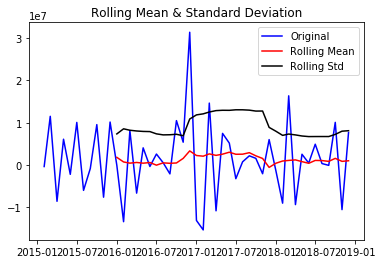

Results of Dickey-Fuller Test:
Test Statistic                -7.200391e+00
p-value                        2.373873e-10
#Lags Used                     1.000000e+00
Number of Observations Used    4.500000e+01
Critical Value (1%)           -3.584829e+00
Critical Value (5%)           -2.928299e+00
Critical Value (10%)          -2.602344e+00
dtype: float64


In [33]:
test_stationarity(diff1)

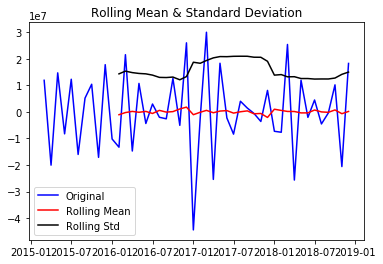

Results of Dickey-Fuller Test:
Test Statistic                 -3.391910
p-value                         0.011238
#Lags Used                     10.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64


In [34]:
diff2=diff1.diff()
diff2=diff2.dropna()

test_stationarity(diff2)

In [35]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


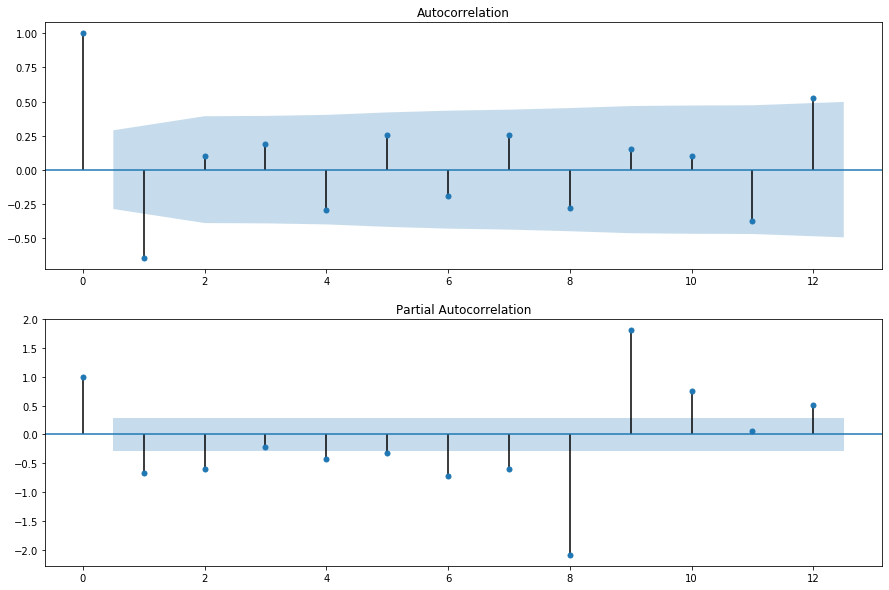

In [36]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff2, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diff2, ax=pyplot.gca(),lags=12)
pyplot.show()

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=1223.033, BIC=1230.810, Time=1.756 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1219.288, BIC=1222.398, Time=0.055 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1222.589, BIC=1228.810, Time=0.581 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1221.744, BIC=1227.965, Time=0.571 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1219.271, BIC=1220.826, Time=0.036 seconds
Fit ARIMA(0,1,0)x(1,1,0,12) [intercept=True]; AIC=1220.848, BIC=1225.514, Time=0.283 seconds
Fit ARIMA(0,1,0)x(0,1,1,12) [intercept=True]; AIC=1219.339, BIC=1224.005, Time=0.462 seconds
Fit ARIMA(0,1,0)x(1,1,1,12) [intercept=True]; AIC=1217.823, BIC=1224.044, Time=0.885 seconds
Fit ARIMA(0,1,0)x(2,1,1,12) [intercept=True]; AIC=1215.074, BIC=1222.851, Time=2.897 seconds
Fit ARIMA(0,1,0)x(2,1,0,12) [intercept=True]; AIC=1213.372, BIC=1219.593, Time=1.631 seconds
Fit ARIMA(1,1,0)x(2,1,0,12

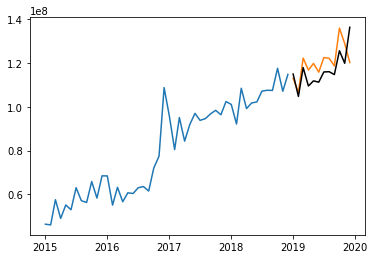

In [37]:
from pmdarima import auto_arima
model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True
                          )
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [38]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -602.686
Date:                            Wed, 10 Jun 2020   AIC                           1213.372
Time:                                    22:25:58   BIC                           1219.593
Sample:                                         0   HQIC                          1215.519
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.761e+05   2.03e+06     -0.136      0.892   -4.26e+06    3.71e+06
ar.S.L12      -0.2679      0.131   

In [39]:
from statsmodels.tsa.arima_model import ARIMA

In [40]:
model = ARIMA(train, order=(0,1,0))
model_fit=model.fit(disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Total   No. Observations:                   47
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -817.965
Method:                           css   S.D. of innovations        8750066.582
Date:                Wed, 10 Jun 2020   AIC                           1639.930
Time:                        22:25:59   BIC                           1643.630
Sample:                    02-01-2015   HQIC                          1641.322
                         - 12-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.458e+06   1.28e+06      1.142      0.253   -1.04e+06    3.96e+06


C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


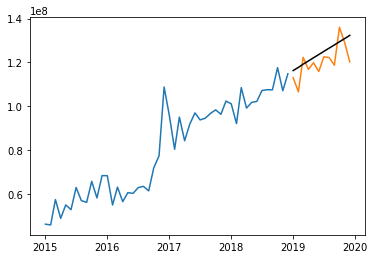

In [41]:
forecast = model_fit.forecast(steps=12)[0]

forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [42]:
forecast

,Prediction
Month-Year,
2019-01-01,116301902.0
2019-02-01,117759654.0
2019-03-01,119217406.0
2019-04-01,120675158.0
2019-05-01,122132910.0
2019-06-01,123590662.0
2019-07-01,125048414.0
2019-08-01,126506166.0
2019-09-01,127963918.0


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_true=test,y_pred=forecast))

5645824.742424243


In [44]:
np.sqrt(mean_absolute_error(y_true=test,y_pred=forecast))

2376.0944304518375

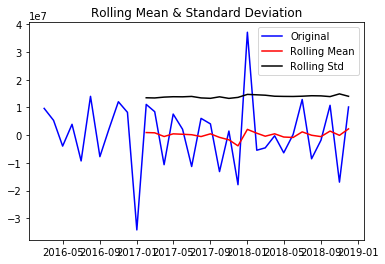

Results of Dickey-Fuller Test:
Test Statistic                 -4.526517
p-value                         0.000176
#Lags Used                      4.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


In [45]:
import statsmodels.api as sm

diffs1=diff2.diff(12)
diffs1=diffs1.dropna()

test_stationarity(diffs1)

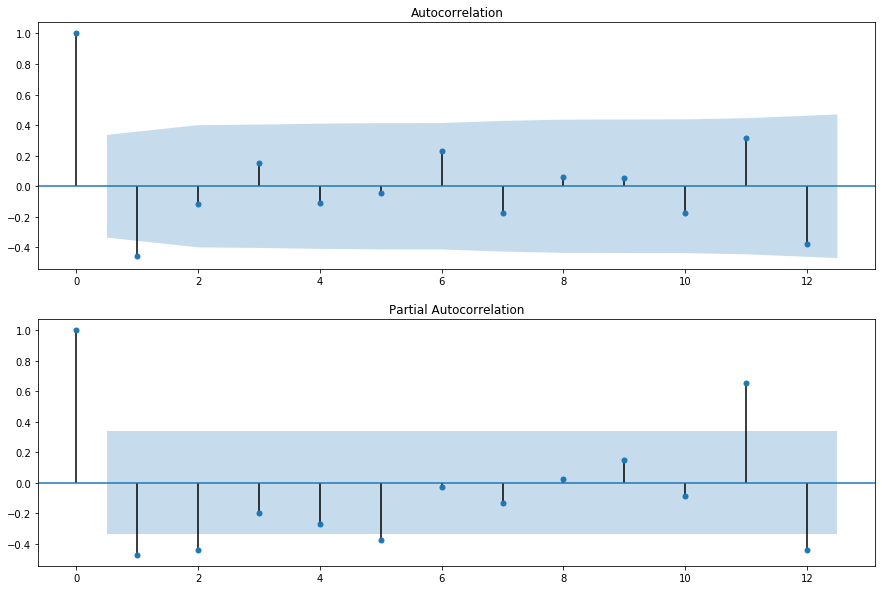

In [46]:
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diffs1, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diffs1, ax=pyplot.gca(),lags=12)
pyplot.show()

In [47]:
train.shape

(48,)

In [48]:
import statsmodels.api as sm
model = sm.tsa.SARIMAX(train, order=(0,1,0), seasonal_order=(2,1,0,12))

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [49]:
model_fit=model.fit(disp=True)
print(model_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              Total   No. Observations:                   48
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -653.221
Date:                            Wed, 10 Jun 2020   AIC                           1312.443
Time:                                    22:26:05   BIC                           1317.109
Sample:                                01-01-2015   HQIC                          1314.053
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.3034      0.016    -18.776      0.000      -0.335      -0.272
ar.S.L24      -0.4497      0.011   

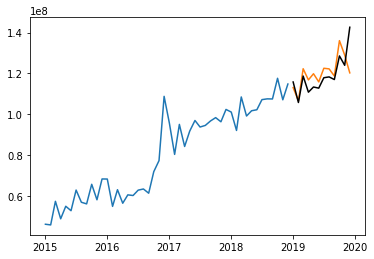

In [50]:
forecast = model_fit.forecast(steps=12)
#print(forecast)

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [51]:
mean_absolute_error(y_true=test,y_pred=forecast)

5643989.462058689

In [52]:
forecast

2019-01-01    1.158377e+08
2019-02-01    1.058148e+08
2019-03-01    1.187388e+08
2019-04-01    1.108548e+08
2019-05-01    1.133869e+08
2019-06-01    1.128262e+08
2019-07-01    1.179156e+08
2019-08-01    1.183178e+08
2019-09-01    1.170333e+08
2019-10-01    1.285649e+08
2019-11-01    1.239818e+08
2019-12-01    1.425837e+08
Freq: MS, dtype: float64

In [53]:
import numpy as np
np.sqrt(mean_absolute_error(y_true=test,y_pred=forecast))

2375.7082022122772

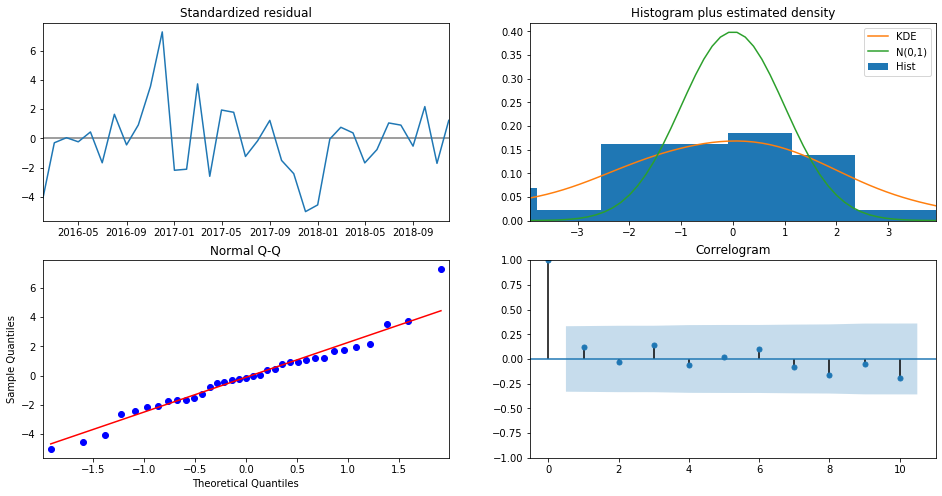

In [54]:
model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()